In [1]:
import pickle
with open('../data/output/perturbed_graphs.txt', 'rb') as f:
    perturbed_graphs = pickle.load(f)
    
len(perturbed_graphs)

1

In [40]:
import torch
from tqdm import tqdm
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

embeddings = torch.rand(5, 32, device=device)# (M, n_graph_embedding, )
prediction = torch.rand(32, device=device)

distances = torch.norm(embeddings - prediction, dim=1)
probabilities = 1 / distances
distances
# 
# (N, n_graph_embedding) x

RuntimeError: The size of tensor a (100) must match the size of tensor b (32) at non-singleton dimension 2

In [112]:

# Compute a probability distribution based on the distance to the prediction
# graph embeddings = num_possible_graphs x n_graph_embedding
# I want a batch_size x num_possible_graphs matrix of distances
graph_embeddings = torch.rand(8123, 100, device=device)
batch_predictions = torch.rand(350, 100, device=device)
graph_embeddings.unsqueeze(0).shape, graph_embeddings.unsqueeze(1).shape

(torch.Size([1, 8123, 100]), torch.Size([8123, 1, 100]))

In [88]:
graph_embeddings, batch_predictions

(tensor([[0.6171, 0.4735, 0.8750],
         [0.3778, 0.7247, 0.4049]], device='mps:0'),
 tensor([[0.8390, 0.5681, 0.2575],
         [0.8372, 0.3677, 0.9201],
         [0.0142, 0.9983, 0.2237],
         [0.4176, 0.1067, 0.3339],
         [0.5650, 0.9921, 0.4199]], device='mps:0'))

In [113]:

embedding_differences = graph_embeddings.unsqueeze(0) - batch_predictions.unsqueeze(1)
print(embedding_differences.shape)
# batch_size x len(graph_embeddings) x n_graph_embedding
abs_differences = torch.abs(embedding_differences)
print(abs_differences.shape)
# batch_size x len(graph_embeddings)
embedding_distances = torch.norm(abs_differences, dim=2)  # L1 norm
print(3, embedding_distances.shape)
probabilities = 1 / embedding_distances
print(probabilities.shape)
# 1 x batch_size
choices = torch.multinomial(probabilities, 1)
choices.cpu().numpy()

torch.Size([350, 8123, 100])
torch.Size([350, 8123, 100])
3 torch.Size([350, 8123])
torch.Size([350, 8123])


array([[4219],
       [7008],
       [1687],
       [3296],
       [3018],
       [1382],
       [5256],
       [7167],
       [ 615],
       [3281],
       [ 119],
       [6264],
       [3318],
       [2676],
       [4918],
       [7109],
       [6623],
       [ 135],
       [5231],
       [7477],
       [3621],
       [1145],
       [2827],
       [4899],
       [4699],
       [4640],
       [5893],
       [1624],
       [2360],
       [4438],
       [4074],
       [7053],
       [ 342],
       [2302],
       [  11],
       [1481],
       [5398],
       [4260],
       [5048],
       [4710],
       [3398],
       [2295],
       [ 372],
       [1839],
       [6945],
       [ 914],
       [2756],
       [6552],
       [5623],
       [5238],
       [3355],
       [1484],
       [2664],
       [3606],
       [1169],
       [2591],
       [ 812],
       [5673],
       [1959],
       [1939],
       [6756],
       [5300],
       [7478],
       [ 914],
       [6057],
       [4769],
       [75

In [115]:
distances = torch.norm(embedding_differences, dim=2)

In [118]:
distances.mean(dim=1)[0]

tensor(4.1469, device='mps:0')

In [1]:
import pickle
with open('../data/prov_dp/output/tc3-theia_N=10/pruned_graphs.pkl', 'rb') as f:
    pruned_graphs, train_data = pickle.load(f)

In [7]:
from utility import save_dot
big_trees = []
for _, tree in train_data:
    if len(tree.edges) > 5:
        big_trees.append(tree)
len(big_trees)

13

In [11]:
from pathlib import Path

save_dot(big_trees[0].to_dot(), Path('./big_tree.dot'))

In [24]:
import pandas as pd
df = pd.read_csv('stats_trimmed.csv')
df['alpha'] = df['alpha'].astype(float)
df['epsilon'] = df['epsilon'].astype(float)
df = df[df['epsilon'] <= 60]
df = df[df['alpha'].isin([0.1, 0.5, 0.9])]
# df['pruned_graph_size_mean'] = df['pruned_graph_size_mean'].astype(float)
len(df)

38

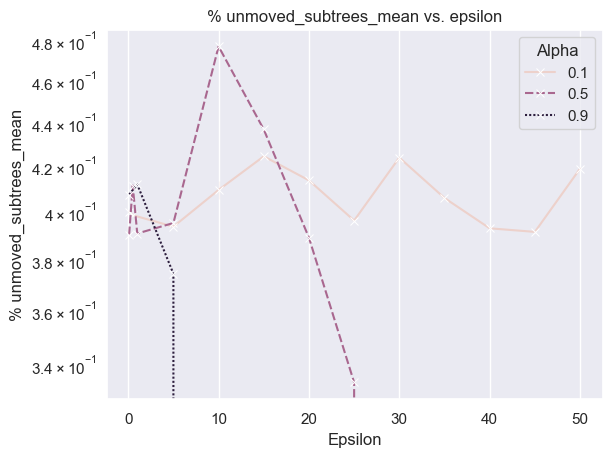

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
def graph(stat):
    sns.set_theme()
    ax = sns.lineplot(
        data=df,
        x='epsilon',
        y=stat,
        hue='alpha',
        marker='x',
        style='alpha',
    )
    ax.set(yscale='log')
    plt.title(f'{stat} vs. epsilon')
    plt.xlabel('Epsilon')
    plt.ylabel(stat)
    plt.legend(title='Alpha')
graph('% unmoved_subtrees_mean')
plt.show()

In [11]:
df

,N,epsilon,alpha,pruned_graph_size_mean,pruned_graph_size_std,pruned_graph_size_min,pruned_graph_size_max,#pruned_edges_mean,#pruned_edges_std,#pruned_edges_min,...,#unmoved_subtrees_std,#unmoved_subtrees_min,#unmoved_subtrees_max,% unmoved_subtrees_mean,% unmoved_subtrees_std,% unmoved_subtrees_min,% unmoved_subtrees_max,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,250,0.1,0.1,1.38218463,11.38648456,1,553,990.292,373.397759,4.0,...,1.715347,0.0,8.0,0.399770,0.355071,0.0,1.702128,NaN,NaN,NaN
1,250,0.1,0.5,1.014202131,0.880888266,1,138,1141.556,313.137859,4.0,...,1.532600,0.0,8.0,0.390075,0.301210,0.0,1.446281,NaN,NaN,NaN
5,250,0.5,0.1,1.175381052,7.304779081,1,553,1069.092,350.220758,4.0,...,1.618933,0.0,11.0,0.398338,0.324061,0.0,2.226721,NaN,NaN,NaN
6,250,0.5,0.5,1.004246689,0.138831079,1,11,1146.480,311.655633,79.0,...,1.577015,0.0,10.0,0.411083,0.308302,0.0,1.525054,NaN,NaN,NaN
9,250,1.0,0.5,1.002313444,0.099665455,1,9,1147.440,311.532403,79.0,...,1.479248,0.0,8.0,0.390624,0.333368,0.0,1.754386,NaN,NaN,NaN
10,250,1.0,0.9,1.000423605,0.036381142,1,6,1148.312,311.561998,79.0,...,1.209436,0.0,5.0,0.411642,0.379249,0.0,1.683502,NaN,NaN,NaN
11,250,5.0,0.1,1.007138563,0.320889047,1,40,1145.020,309.840842,79.0,...,1.478275,0.0,8.0,0.393500,0.289693,0.0,1.318681,NaN,NaN,NaN
12,250,5.0,0.5,1.000109194,0.013489934,1,3,1148.416,311.557897,79.0,...,0.986379,0.0,5.0,0.395032,0.402983,0.0,1.869159,NaN,NaN,NaN
13,250,5.0,0.9,1,0,1,1,1148.440,311.561844,79.0,...,0.237487,0.0,1.0,0.374240,1.535995,0.0,10.000000,NaN,NaN,NaN
14,250,10.0,0.1,1.004352064,0.14540586,1,18,1146.404,311.542024,79.0,...,1.643046,0.0,12.0,0.405346,0.316040,0.0,1.691332,NaN,NaN,NaN


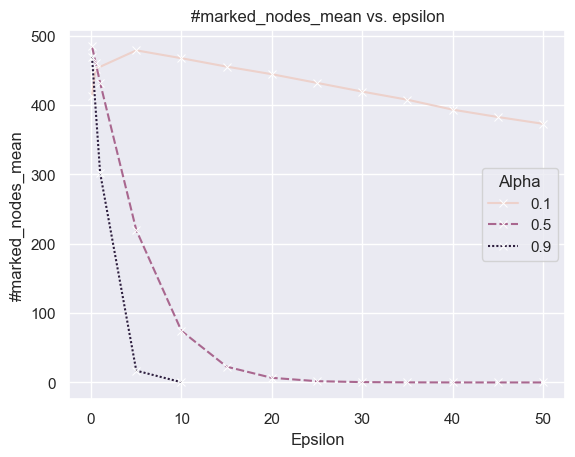

In [12]:
graph('#marked_nodes_mean')

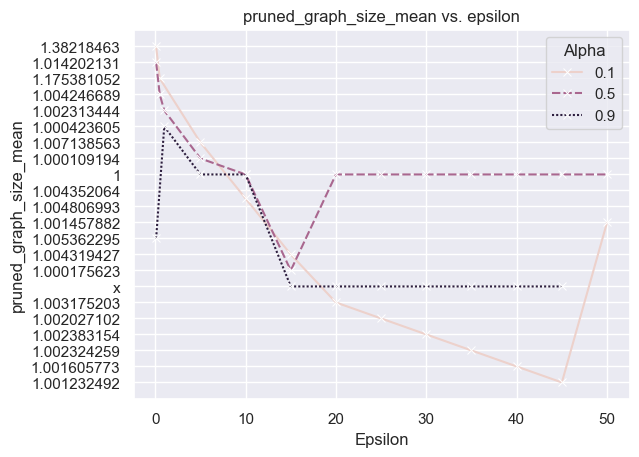

In [13]:
graph('pruned_graph_size_mean')

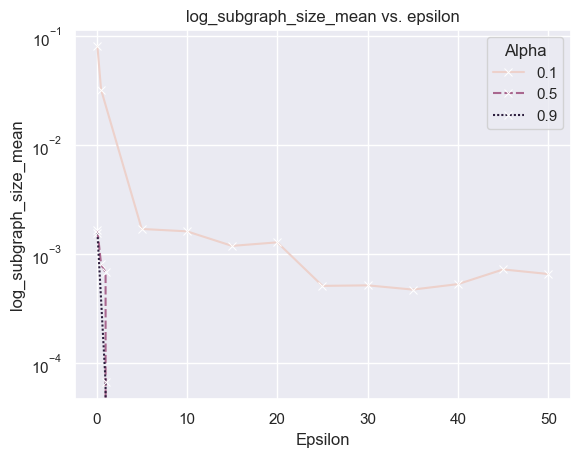

In [41]:
import numpy as np
df['log_subgraph_size_mean'] = df['subgraph_size_mean'].apply(lambda x: x if x == 0 else np.log(x))
graph('log_subgraph_size_mean')

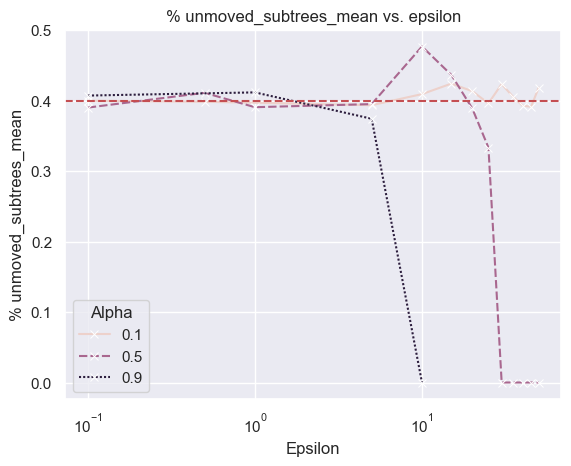

In [37]:
import numpy as np
stat = '% unmoved_subtrees_mean'

sns.set_theme()
ax = sns.lineplot(
    data=df,
    x='epsilon',
    y=stat,
    hue='alpha',
    marker='x',
    style='alpha',
)
ax.set(xscale='log')
plt.axhline(y=100/250, color='r', linestyle='--')
plt.title(f'{stat} vs. epsilon')
plt.xlabel('Epsilon')
plt.ylabel(stat)
plt.legend(title='Alpha')

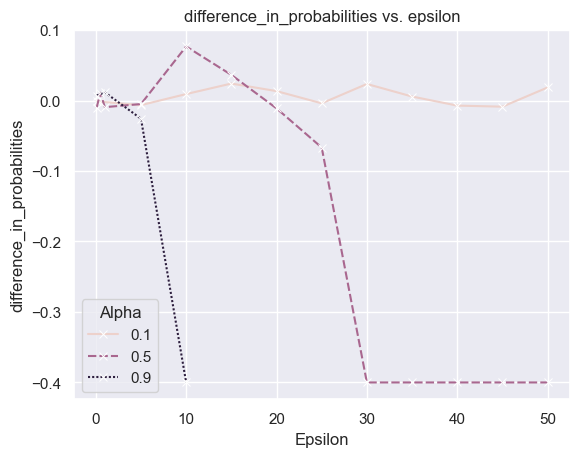

In [33]:
import numpy as np
df['difference_in_probabilities'] = df['% unmoved_subtrees_mean']  (100/250)
graph('difference_in_probabilities')

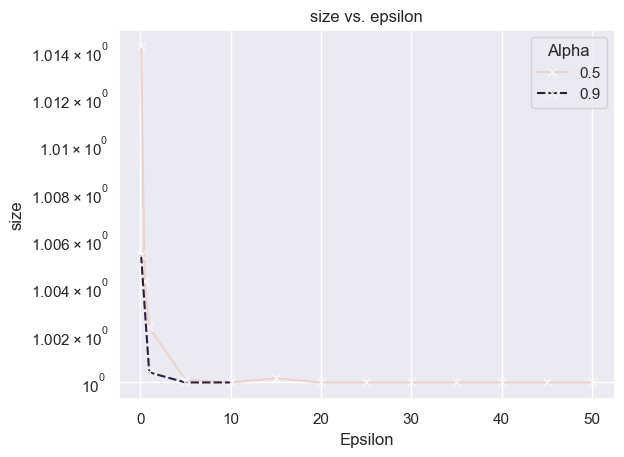

In [43]:
df = df[df['alpha'].isin([0.5, 0.9])]
df = df[df['pruned_graph_size_mean'] != 'x']
df['size'] = df['pruned_graph_size_mean'].astype('float')
graph('size')

In [46]:
df.columns

Index(['N', 'epsilon', 'alpha', 'pruned_graph_size_mean',
       'pruned_graph_size_std', 'pruned_graph_size_min',
       'pruned_graph_size_max', '#pruned_edges_mean', '#pruned_edges_std',
       '#pruned_edges_min', '#pruned_edges_max', 'subgraph_size_mean',
       'subgraph_size_std', 'subgraph_size_min', 'subgraph_size_max',
       '#marked_nodes_mean', '#marked_nodes_std', '#marked_nodes_min',
       '#marked_nodes_max', '#unmoved_subtrees_mean', '#unmoved_subtrees_std',
       '#unmoved_subtrees_min', '#unmoved_subtrees_max',
       '% unmoved_subtrees_mean', '% unmoved_subtrees_std',
       '% unmoved_subtrees_min', '% unmoved_subtrees_max', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'difference_in_probabilities', 'size',
       'log_subgraph_size_mean'],
      dtype='object')